###

### Decision tree
- 7/3 2024
- Decision trees blir lätt komplicerade, och därmed overfittade
- Kap 8 i boken.
- I denna övningen visar vi hur svårt det är att göra regression med decision trees. Problemet är att denna metoden snabbt blir overfit. Det beror på att datan hela tiden splittas i olika fraktioner. Det gör att den snabbt blir bra på själva träningsdatan men inte alls fungerar på testdatan.
- Ett sätt att göra det bättre är att använda "Random Forest", men det går vi inte igenom här.

In [20]:
import pandas as pd
df = pd.read_csv('../data/Hitters.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [22]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

<Axes: xlabel='Years', ylabel='Hits'>

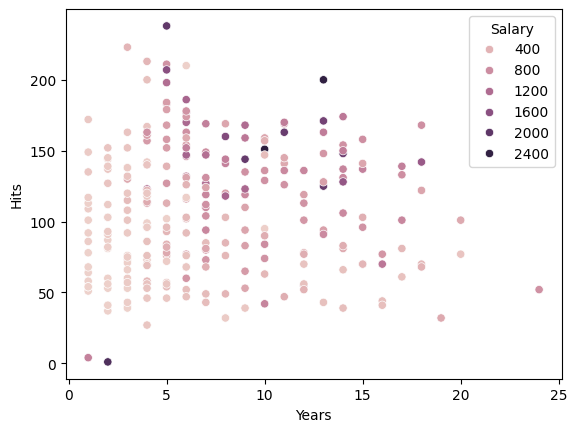

In [23]:
import seaborn as sns
sns.scatterplot(data = df, x ='Years', y='Hits', hue='Salary')

Gör klart nedan cell

ValueError: could not convert string to float: 'N'

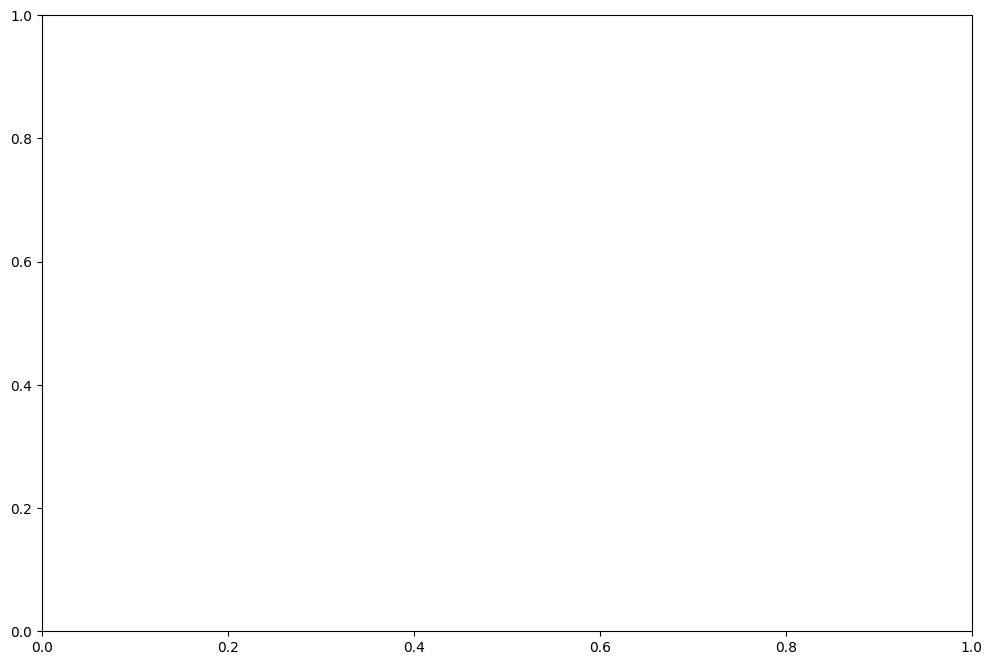

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, ax=ax)

In [26]:
df = pd.get_dummies(data = df, columns = ['League','Division','NewLeague'], dtype=float, drop_first=True)

In [27]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

model_tree = DecisionTreeRegressor(max_depth=2)

X, y = df.drop(['Salary','Errors'], axis='columns'), df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train
#model_tree.fit(X_train, y_train)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,League_N,Division_W,NewLeague_N
226,547,137,2,58,47,12,2,1038,271,3,129,80,24,261,459,0.0,1.0,0.0
220,299,75,6,38,23,26,3,580,160,8,71,33,44,212,1,1.0,0.0,1.0
128,584,158,15,70,84,42,5,2358,636,58,265,316,134,331,20,1.0,0.0,1.0
222,381,110,9,61,45,32,7,3015,834,40,451,249,168,228,7,1.0,0.0,1.0
81,255,70,7,49,35,43,15,6311,1661,154,1019,608,820,51,54,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,629,168,18,73,102,40,18,8424,2464,164,1008,1072,402,1067,157,0.0,0.0,0.0
236,237,52,0,15,25,30,24,14053,4256,160,2165,1314,1566,523,43,1.0,1.0,1.0
93,511,138,25,76,96,61,3,592,164,28,87,110,71,157,7,0.0,1.0,0.0
137,343,103,6,48,36,40,15,4338,1193,70,581,421,325,211,56,0.0,0.0,0.0


In [30]:
df = pd.read_csv('../data/Default.csv')
df = pd.get_dummies(df, drop_first=True, dtype=int)

X, y = df.drop('default_Yes', axis='')

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0
...,...,...,...,...
9995,711.555020,52992.378914,0,0
9996,757.962918,19660.721768,0,0
9997,845.411989,58636.156984,0,0
9998,1569.009053,36669.112365,0,0
